<a href="https://colab.research.google.com/github/Galzi1/DataDiscoveryNNProj/blob/master/project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Data Discovery and Neural Networks : Final Project

In this notebook we will prepare data and run several algorithms for classification

# 1. Imports

In [2]:
# add more packages in this section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. data preperation

In [3]:
# data = pd.read_csv("data/adult.data", header = None)
data = pd.read_csv("https://raw.githubusercontent.com/Galzi1/DataDiscoveryNNProj/master/data/adult.data", header = None)
cols = ['age', 'workclass', 'fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss'
    ,'hours_per_week','native_country','y']
data.columns = cols

## 2.1 Categorical feature handling
* Name two machine learning algorithms that can deal with categorical features without special handling?

special handling = one hot encoding exc..

#### YOUR VERBAL SOLUTION HERE
* Naive Bayes (explain some)
* Some Tree-based algorithm (specify one and explain)


#### END YOUR VERBAL SOLUTION HERE

## 2.2 One hot encoding 

* Remove the y column from the data variable and save it to the variable y
* Transform the categorical columns to one hot encoding

You may find get_dummies function in pandas useful

In [4]:
### YOUR CODE HERE
y = data['y']
X = data.drop(['y'], axis=1)

obj_cols = list(X.select_dtypes(include=['object']).columns)

X = pd.get_dummies(X, columns=obj_cols, drop_first=True)

X.head()


### END YOUR CODE

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.3 Train test split

* Convert the y column - replace <=50K with 0 and >50K with 1 
* Split the dataset into train and test set (use 15% for the test set)

at the end, make sure you have the following variables:

* X
* y
* X_train
* X_test
* y_train
* y_test

You may find sklearn train_test_split useful

In [5]:
### YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)




### END YOUR CODE

## 2.3 Numeric feature normalization

* Scale the numeric features to to have zero mean (z score normalization)

- Don't scale the boolean features

You may find sklearn StandardScaler useful

In [7]:
### YOUR CODE HERE
from sklearn import preprocessing

int_cols = list(X.select_dtypes(include=['int64']).columns)

X_train[int_cols] = preprocessing.StandardScaler().fit_transform(X_train[int_cols])
X_test[int_cols] = preprocessing.StandardScaler().fit_transform(X_test[int_cols])


### END YOUR CODE

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

# 3 Models

Create a function `cv(x, y, model)` (cv stands for cross validation) that gets a model (sklearn classifier) and the data.  
The function should fit the model using k fold cross validation with k = 5, and print the 'roc_auc' on each fold (which is the scoring parameter for the cross val_score function).


[Computing cross-validated metrics](https://scikit-learn.org/stable/modules/cross_validation.html)


In [18]:
## YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, log_loss

def cv(x, y, model):
  scoring = ['roc_auc']
  scores = cross_validate(model, x, y, scoring=scoring)
  print(scores['test_roc_auc'])




## END YOUR CODE

## 3.1 Baseline model - logistic regression
Our first algorithm will be logistic regression, since it's always nice to know how well can we do with a simple algorithm.
* Should we use class_weight = 'balanced' in sklearn logistic regression? why?
* Check how the results differ with and without the 'balanced' parameter - use `cv(x, y, model)` for that purpose, explain your answer
* Fit a model on X_train, y_train and plot the precision recall curve on the test data.
* If we would plot this curve on each fold (of the 5 folds in the cross validation), would we get exactly the same plot?

Do not change other hyperparameters

[precision recall curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [20]:
## YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=300)
cv(X, y, clf)

clf_balanced = LogisticRegression(class_weight='balanced', max_iter=300)
cv(X, y, clf_balanced)



## END YOUR CODE

[0.85012935 0.57622438 0.58222977 0.56844593 0.84446876]
[0.67854476 0.87181471 0.67400446 0.66862456 0.77641163]


#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE

## 3.2 ANN
ANN (MLPClassifier in sklearn):

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters

In [ ]:
### YOUR CODE HERE
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_train, y_train)





### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE

## 3.3 Random forest
Random Forest classifier:

* Fit a model on X_train, y_train and print the AUC and the Log Loss on the train and test data.
* Explain your results - are they better or worse than the baseline? try to explain why

Do not change hyperparameters


In [8]:
### YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(metrics.auc(fpr, tpr))







### END YOUR CODE

0.7926106856566301


#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE

## 3.4 Confusion matrix
Plot/print the confusion matrix of the random forest model on the test data

Explain shortly your results

Confusion matrix, without normalization
[[3477  251]
 [ 402  755]]
Normalized confusion matrix
[[0.93 0.07]
 [0.35 0.65]]
Normalized Pred confusion matrix
[[0.9  0.25]
 [0.1  0.75]]


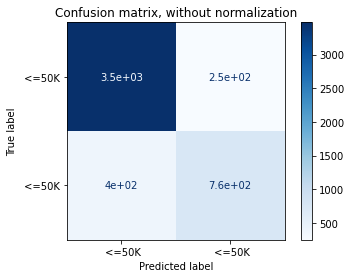

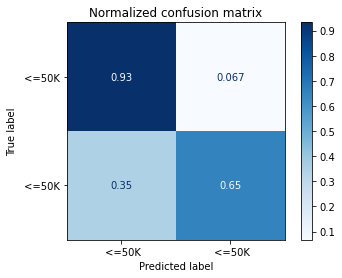

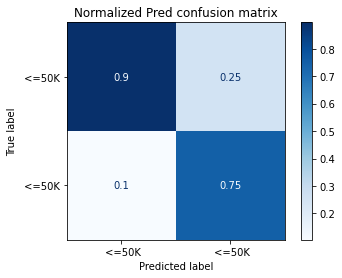

In [9]:
### YOUR CODE HERE
from sklearn.metrics import plot_confusion_matrix

class_names = data['y']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true'), 
                  ("Normalized Pred confusion matrix", 'pred')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE

## 3.4 Global feature importance of the random forest and SHAP

* Plot the global feature importance of the features - use SHAP for this purpsose
* Choose two samples from the dataset and plot/print the local explanations for this samples. Explain which features
are important
* Explain in few words how this feature importance is calculated

**SHAP can be very slow on the random forest model. Thus, train another model with shallow trees (depth <7 for example) and you can also compute the SHAP values on a small data set. If it is yet very slow you, try to fit a different classifier for this purpose (MLP for example or GradientBoostingClassifier). You can also discard the binary features (which derived from the categorical features) for this purpose and stay only with the numerical ones.**


In [ ]:
### YOUR CODE HERE








### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE

## 4 Clustering
Imagine that we don't really know the true labels -> we need to use unsupervised machine learning.

* Perform k means on X_train with k = 2. Is our clusters represent rich and poor people (does one cluster represent 'rich' ('>= 50k') people and the other 'poor' people)?

* Do the same with dbscan, understand how many clusters did you get and the proportion of 'rich' and 'poor' people in each cluster.

* Plot the clusters using pca (only for the kmeans). Are they seperated in the PCA dimension?
 
This question is more open minded and you can (recomended) use graphs that explain how well did the clustering work. Did it work well?? 

In [53]:
print(list(X_train.loc[pd.isna(X_train["age"]), :].index))
print(X_train.loc[28956, :])
# print(X_train.isna().sum())
# print("########################")
# # 2)
# for c in X_train.columns:
#   if not np.issubdtype(X_train[c].dtype, np.number):
#     print(f'Column = {c}; unique values = {sorted(X_train[c].unique())}')
# print("########################")
# # 3)
# for c in X_train.columns:
#   if not np.issubdtype(X_train[c].dtype, np.number):
#   print(f'Column = {c}; Number of "?" = {X_train[X_train[c] == " ?"].shape[0]}')
# print("########################")

[]
age                                    35
fnlwgt                             101509
education_num                          10
capital_gain                            0
capital_loss                            0
                                    ...  
native_country_ Thailand                0
native_country_ Trinadad&Tobago         0
native_country_ United-States           1
native_country_ Vietnam                 0
native_country_ Yugoslavia              0
Name: 28956, Length: 100, dtype: int64


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

In [ ]:
import pylab as pl

for i in range (0, pca_2d.shape[0]):
  print(i)
  if y_train[i] == 0:
    c1 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
  else:
    c2 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')

pl.legend([c1, c2], ['<=50K', '>50K'])
pl.title('Known outcomes')
pl.show()

In [16]:
groups = data.groupby('y')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(pca_2d[:,], pca_2d[, :], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

SyntaxError: ignored

In [ ]:
import pylab as pl

c1 = list()
c2 = list()

for i in range (0, pca_2d.shape[0]):
  print(i)
  if y_train[i] == 0:
    c1.append(pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+'))
  else:
    c2.append(pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o'))

pl.legend([c1, c2], ['<=50K', '>50K'])
pl.title('Known outcomes')
pl.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

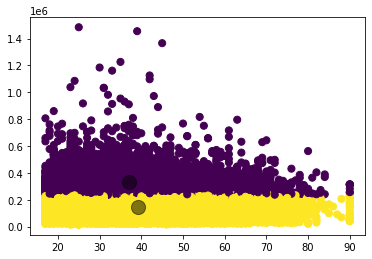

In [16]:
### YOUR CODE HERE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
centroids = kmeans.cluster_centers_

plt.scatter(X_train, X_train.iloc[:, 1], c=labels, s=50, cmap='viridis')


plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

plt.show()

### END YOUR CODE

#### YOUR VERBAL SOLUTION HERE



#### END YOUR VERBAL SOLUTION HERE